In [1]:
## Project Title: Financial Data Analysis

In [3]:
## introduction:
## Goal : Perform Detail Analysis of Financial data including trend analysis and comparative studies.

In [9]:
##config.py
API_KEY = 'gQzh1wg5UYcGAZGisVeh'

In [11]:
import config
api_key = config.API_KEY

In [13]:
import requests
import pandas as pd
import matplotlib
import json

api_url = 'https://data.nasdaq.com/api/v3/datatables/MER/F1.json'
parameters = {
    'api_key' : 'gQzh1wg5UYcGAZGisVeh' ,
    'qopts.per_page': 10000
}
response = requests.get(api_url, params = parameters)
json_data = response.json()

columns = [col['name'] for col in json_data['datatable']['columns']]

data = json_data['datatable']['data']

df_metric = pd.DataFrame(data, columns = columns)
df_metric

,compnumber,reportid,mapcode,amount,reportdate,reporttype,auditorstatus,currency,consolidated,longname,...,city,statecode,country,zipcode,phonenumber,faxnumber,website,fye,indicator,statement
0,2438,1868192544,-1802,1.048195e+01,2011-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
1,2438,1868216112,-1802,8.161754e+00,2011-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
2,2438,1885063456,-1802,1.078821e+01,2012-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
3,2438,1885087024,-1802,9.437545e+00,2012-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
4,2438,1901934112,-1802,8.755041e+00,2013-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,76258,1593770752,-4049,8.060000e+08,2014-09-30,Q3,U,USD,True,Chubb Ltd,...,Zurich,None,CHE,CH-8001,(41) 43 456 7600,None,www.chubb.com,2023-12-31,Cash and Equivalents,Balance Sheet
9996,76258,1593770752,-1766,2.115900e-01,2014-09-30,Q3,U,USD,True,Chubb Ltd,...,Zurich,None,CHE,CH-8001,(41) 43 456 7600,None,www.chubb.com,2023-12-31,Total Asset Turnover,Derived
9997,76258,1593770752,-9085,5.330200e-02,2014-09-30,Q3,U,USD,True,Chubb Ltd,...,Zurich,None,CHE,CH-8001,(41) 43 456 7600,None,www.chubb.com,2023-12-31,Revenue to Assets,Derived
9998,76258,1593770752,-5009,8.051120e-01,2014-09-30,Q3,U,USD,True,Chubb Ltd,...,Zurich,None,CHE,CH-8001,(41) 43 456 7600,None,www.chubb.com,2023-12-31,Return on Assets,Derived


In [14]:
df_metric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   compnumber     10000 non-null  int64  
 1   reportid       10000 non-null  int64  
 2   mapcode        10000 non-null  int64  
 3   amount         10000 non-null  float64
 4   reportdate     10000 non-null  object 
 5   reporttype     10000 non-null  object 
 6   auditorstatus  9999 non-null   object 
 7   currency       10000 non-null  object 
 8   consolidated   10000 non-null  object 
 9   longname       10000 non-null  object 
 10  shortname      10000 non-null  object 
 11  status         10000 non-null  object 
 12  countrycode    10000 non-null  object 
 13  region         10000 non-null  object 
 14  cik            10000 non-null  int64  
 15  mic            10000 non-null  object 
 16  ticker         9380 non-null   object 
 17  exchange       10000 non-null  object 
 18  address

In [15]:
necessary_columns = ['indicator', 'country', 'longname', 'reportdate', 'reporttype', 'amount']
filter_df = df_metric[necessary_columns]
updated_df = filter_df[filter_df['indicator']== 'Accrued Expenses Turnover']
df = pd.DataFrame(updated_df)
df



,indicator,country,longname,reportdate,reporttype,amount
0,Accrued Expenses Turnover,DEU,Deutsche Bank AG,2011-06-30,Q2,10.481948
1,Accrued Expenses Turnover,DEU,Deutsche Bank AG,2011-09-30,Q3,8.161754
2,Accrued Expenses Turnover,DEU,Deutsche Bank AG,2012-06-30,Q2,10.788213
3,Accrued Expenses Turnover,DEU,Deutsche Bank AG,2012-09-30,Q3,9.437545
4,Accrued Expenses Turnover,DEU,Deutsche Bank AG,2013-06-30,Q2,8.755041
...,...,...,...,...,...,...
8454,Accrued Expenses Turnover,USA,Nielsen Holdings PLC,2011-12-31,A,96.208696
8685,Accrued Expenses Turnover,USA,Nielsen Holdings PLC,2012-12-31,A,111.933333
8920,Accrued Expenses Turnover,USA,Nielsen Holdings PLC,2013-12-31,A,122.645161
9153,Accrued Expenses Turnover,USA,Nielsen Holdings PLC,2014-12-31,A,147.952941


In [17]:
def get_name(country):
    country_names = {'USA' : 'United States of America',
                'DEU' : 'Germany'}
    return country_names.get(country)
df['country_names'] = df['country'].apply(get_name)
df

,indicator,country,longname,reportdate,reporttype,amount,country_names
0,Accrued Expenses Turnover,DEU,Deutsche Bank AG,2011-06-30,Q2,10.481948,Germany
1,Accrued Expenses Turnover,DEU,Deutsche Bank AG,2011-09-30,Q3,8.161754,Germany
2,Accrued Expenses Turnover,DEU,Deutsche Bank AG,2012-06-30,Q2,10.788213,Germany
3,Accrued Expenses Turnover,DEU,Deutsche Bank AG,2012-09-30,Q3,9.437545,Germany
4,Accrued Expenses Turnover,DEU,Deutsche Bank AG,2013-06-30,Q2,8.755041,Germany
...,...,...,...,...,...,...,...
8454,Accrued Expenses Turnover,USA,Nielsen Holdings PLC,2011-12-31,A,96.208696,United States of America
8685,Accrued Expenses Turnover,USA,Nielsen Holdings PLC,2012-12-31,A,111.933333,United States of America
8920,Accrued Expenses Turnover,USA,Nielsen Holdings PLC,2013-12-31,A,122.645161,United States of America
9153,Accrued Expenses Turnover,USA,Nielsen Holdings PLC,2014-12-31,A,147.952941,United States of America


In [29]:
updated_df = df.rename(columns = {'longname' : 'company_name'})
updated_df

,indicator,country,company_name,reportdate,reporttype,amount,country_names
0,Accrued Expenses Turnover,DEU,Deutsche Bank AG,2011-06-30,Q2,10.481948,Germany
1,Accrued Expenses Turnover,DEU,Deutsche Bank AG,2011-09-30,Q3,8.161754,Germany
2,Accrued Expenses Turnover,DEU,Deutsche Bank AG,2012-06-30,Q2,10.788213,Germany
3,Accrued Expenses Turnover,DEU,Deutsche Bank AG,2012-09-30,Q3,9.437545,Germany
4,Accrued Expenses Turnover,DEU,Deutsche Bank AG,2013-06-30,Q2,8.755041,Germany
...,...,...,...,...,...,...,...
8454,Accrued Expenses Turnover,USA,Nielsen Holdings PLC,2011-12-31,A,96.208696,United States of America
8685,Accrued Expenses Turnover,USA,Nielsen Holdings PLC,2012-12-31,A,111.933333,United States of America
8920,Accrued Expenses Turnover,USA,Nielsen Holdings PLC,2013-12-31,A,122.645161,United States of America
9153,Accrued Expenses Turnover,USA,Nielsen Holdings PLC,2014-12-31,A,147.952941,United States of America


In [39]:
a = updated_df['country_names'].value_counts()
a

country_names
United States of America    31
Germany                      6
Name: count, dtype: int64

In [45]:
# Convert 'report_date' to datetime and filter for 2010-2015
updated_df['reportdate'] = pd.to_datetime(updated_df['reportdate'])
updated_df = updated_df[(updated_df['reportdate'].dt.year >= 2010) & (updated_df['reportdate'].dt.year <= 2015)]

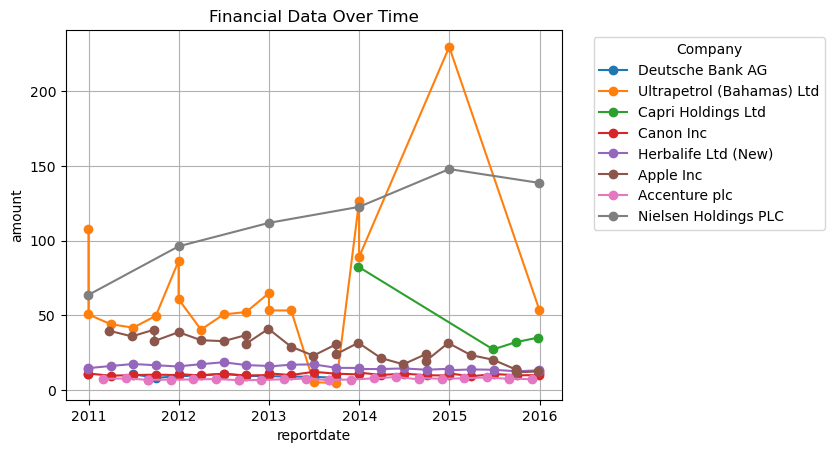

In [69]:
import matplotlib.pyplot as plt
relevant_data = ['company_name','reportdate','amount']
rd = updated_df[relevant_data]
rd
for company in rd['company_name'].unique():
    company_data = rd[rd['company_name'] == company]
    plt.plot(company_data['reportdate'], company_data['amount'], marker='o', label=company)
plt.xlabel('reportdate')
plt.ylabel('amount')
plt.title('Financial Data Over Time')

# Add a well-positioned legend
plt.legend(title="Company", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show grid for better readability
plt.grid(True)

# Display the plot
plt.show()

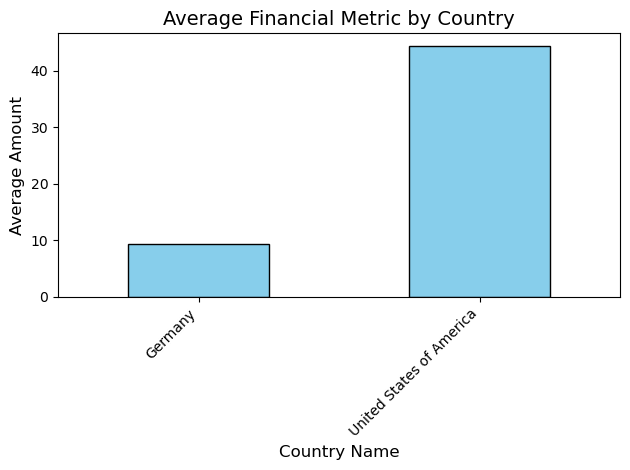

In [75]:
country_avg = updated_df.groupby('country_names')['amount'].mean()
country_avg.plot(kind='bar', color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Average Financial Metric by Country', fontsize=14)
plt.xlabel('Country Name', fontsize=12)
plt.ylabel('Average Amount', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Optimize layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()